Очень часто зависимея переменная лучше корелирует с какой-то частью даты/вермени, чем с конкретным очень точным представлением времени (вплоть до секунды). Поэтому временные метки расчлиняют и преобразуют в фичи более высоких размернойстей, либо в синтетические фичи.

Из одного столбика даты/времени можно вытащить очень много новый фич. Посмотрим как это сделать...

# Тестовый датасет

Создадим годовой набор дат с периодом в час.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

time_range = pd.date_range('01.01.2019', '31.12.2019 23:00', freq='H')
df = pd.DataFrame(time_range, columns=['time'])

In [2]:
df.head()

,time
0,2019-01-01 00:00:00
1,2019-01-01 01:00:00
2,2019-01-01 02:00:00
3,2019-01-01 03:00:00
4,2019-01-01 04:00:00


# Базовые фичи

Базовые фичи можно легко вытащить с помощью стандартных функций numpy.

In [3]:
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second

df['year'] = df['time'].dt.year
df['quarter'] = df['time'].dt.quarter
df['month'] = df['time'].dt.month
df['week'] = df['time'].dt.week
    
df['day_of_year'] = df['time'].dt.dayofyear
df['day_of_month'] = df['time'].dt.day
df['day_of_week'] = df['time'].dt.dayofweek

In [4]:
df.head(6).T

,0,1,2,3,4,5
time,2019-01-01 00:00:00,2019-01-01 01:00:00,2019-01-01 02:00:00,2019-01-01 03:00:00,2019-01-01 04:00:00,2019-01-01 05:00:00
hour,0,1,2,3,4,5
minute,0,0,0,0,0,0
second,0,0,0,0,0,0
year,2019,2019,2019,2019,2019,2019
quarter,1,1,1,1,1,1
month,1,1,1,1,1,1
week,1,1,1,1,1,1
day_of_year,1,1,1,1,1,1
day_of_month,1,1,1,1,1,1


# Дополнительные фичи

Здесь мы уже получаем некоторые синтетические или условные фичи. Список здесь не полный, можно придумать еще - все зависит от задачи и потребностей.

Чтобы отработал этот кусок кода, необходимо сначала создать базовые фичи.

In [5]:
df['half_year'] = (df['time'].dt.month - 1) // 6

seasons = [1,1,2,2,2,3,3,3,4,4,4,1]
df['season'] = df['month'].apply(lambda month: seasons[month-1])
    
df['year_plus_half_year'] = df['time'].dt.year * 10 + ((df['time'].dt.month - 1) // 6)
df['year_plus_quarter'] = df['time'].dt.year * 10 + df['time'].dt.quarter
df['year_plus_month'] = df['time'].dt.year * 100 + df['time'].dt.month
df['year_plus_week'] = df['time'].dt.year * 100 + df['time'].dt.week
    
df['days_from_start'] = (df['time'] - df['time'].min()).dt.days
df['days_to_end'] = (df['time'].max() - df['time']).dt.days

df['time_diff_form_start'] = df['time'] - df['time'].min()
df['time_start_diff_days'] = (df['time_diff_form_start'] / np.timedelta64(1,'D')).round(0)
df['time_start_diff_weeks'] = (df['time_diff_form_start'] / np.timedelta64(1,'W')).round(0)
df['time_start_diff_months'] = (df['time_diff_form_start'] / np.timedelta64(1,'M')).round(0)
df['time_start_diff_years'] = (df['time_diff_form_start'] / np.timedelta64(1,'Y')).round(0)
df.drop('time_diff_form_start', axis=1, inplace=True)

def get_part_of_day(hour):
    part_of_day = np.NaN
    
    if 5 <= hour <= 11:
        part_of_day = 'morning'
    elif 12 <= hour <= 17:
        part_of_day = 'afternoon'
    elif 18 <= hour <= 22:
        part_of_day = 'evening'
    elif 23 <= hour or hour <= 4:
        part_of_day = 'night'
    
    return part_of_day
    

df['part_of_day'] = df['hour'].apply(lambda hour: get_part_of_day(hour))

In [6]:
df.head(6).T

,0,1,2,3,4,5
time,2019-01-01 00:00:00,2019-01-01 01:00:00,2019-01-01 02:00:00,2019-01-01 03:00:00,2019-01-01 04:00:00,2019-01-01 05:00:00
hour,0,1,2,3,4,5
minute,0,0,0,0,0,0
second,0,0,0,0,0,0
year,2019,2019,2019,2019,2019,2019
quarter,1,1,1,1,1,1
month,1,1,1,1,1,1
week,1,1,1,1,1,1
day_of_year,1,1,1,1,1,1
day_of_month,1,1,1,1,1,1


# Бинарные фичи

Бинарные фичи это просто представление одной переменной через несколько других, где каждая будет соответствовать бинарному представлению одного из значений исходной фичи. Например, одну фичу "день недели", можно представить семью фичами день\_недели\_1, день\_недели\_2, ..., день\_недели\_2. Если сейчас первый день недели, то в день\_недели\_1 записывается 1, иначе - 0, и т.д.

Как показала практика, правильно подобранные бинарные фичи хорошо "кушаются" линейными и "деревянными" моделями.

Чтобы отработал этот кусок кода, необходимо сначала создать базовые фичи.

In [7]:
df['is_day_of_week'] = df['day_of_week']
df = pd.get_dummies(df, columns = ['is_day_of_week'])

df['is_quarter'] = df['quarter']
df = pd.get_dummies(df, columns = ['is_quarter'])

df['is_month'] = df['month']
df = pd.get_dummies(df, columns = ['is_month'])

df['is_season'] = df['season']
df = pd.get_dummies(df, columns = ['is_season'])

df['is_weekend'] =  (df['day_of_week'] > 5).astype(int)
df['is_working_day'] = (df['day_of_week'] < 5).astype(int)

df['is_month_start'] = df['time'].dt.is_month_start.astype(int)
df['is_month_end'] = df['time'].dt.is_month_end.astype(int)

In [8]:
cols = [c for c in df.columns if 'is_' in c]
df[cols].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
is_day_of_week_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
is_day_of_week_1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
is_day_of_week_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
is_day_of_week_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
is_day_of_week_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
is_day_of_week_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
is_day_of_week_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
is_quarter_1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
is_quarter_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
is_quarter_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


З.Ы. Также можно преобразовать в бинарные переменные week, day_of_year, day_of_month, но их получится довольно много.

# Косинусо/синусное преобразование

## Теория

Некоторые данные по своей природе имеют циклическую структуру:
- Географичекие данне (широта - от 0 до 90 и долгота - от 0 до 180)
- Цветовое представление (RGB, где цвет по каждому элементу кодируется от 0 до 255).
- Время (минуты, часы, секунды, день недели, неделя месяца, месяц, сезон).

Рассмотрим, например, часы за одну неделю:

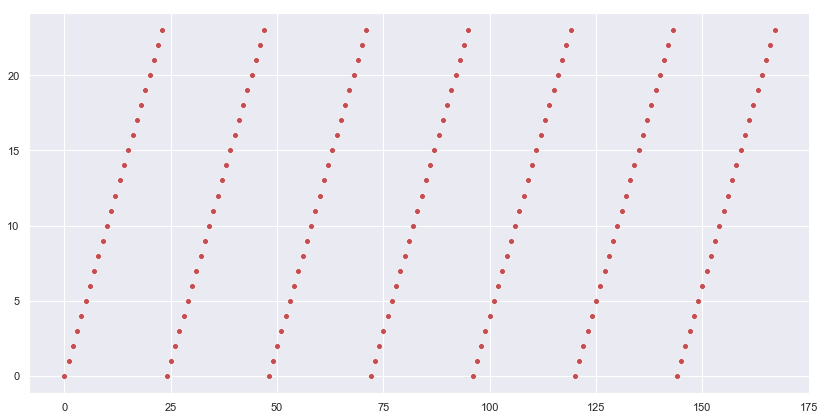

In [9]:
plt.figure(figsize=(14,7))

sns.scatterplot(
    data=df.query('day_of_year <= 7')['hour'],
    color='r'
);

Как можно заметить, после 23 часа идет резкий обрыв до 0 часов. Поэтому с т.з. самих чисел 23 ближе к 20, чем к 0. Но с точки зрения времени это не так: 23 час ближе к полуночи, чем к 20 часам. И наша задача передать модели корректное пространственное расположение чисел относительно друг-друга. Для этого делают косинусо/синусное преобразование циклической фичи в 2 измерения:

In [10]:
hours_in_day = 24

df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / hours_in_day)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / hours_in_day)

df[['hour','hour_sin','hour_cos']].head()

,hour,hour_sin,hour_cos
0,0,0.000000,1.000000
1,1,0.258819,0.965926
2,2,0.500000,0.866025
3,3,0.707107,0.707107
4,4,0.866025,0.500000


В результате данные будут иметь непрерывную циклическую структуру:

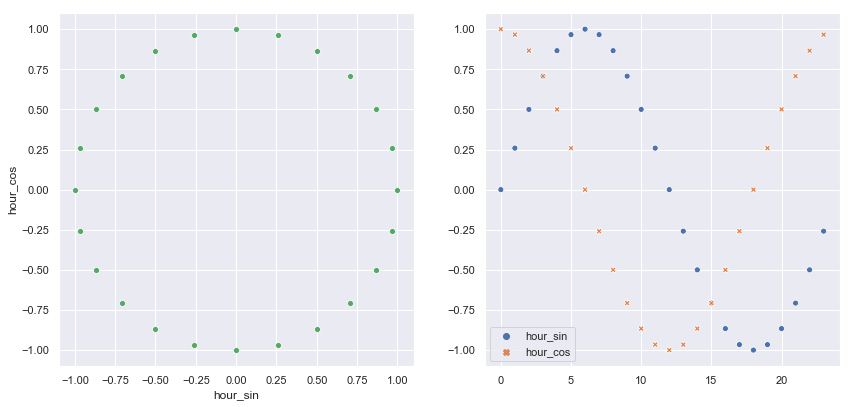

In [11]:
f, ax = plt.subplots(1, 2, figsize=(14,6.5))

sns.scatterplot(
    x='hour_sin', y='hour_cos',
    data=df.query('day_of_year == 1')[['hour_sin','hour_cos']],
    color='g', ax=ax[0]
);

sns.scatterplot(
    data=df.query('day_of_year == 1')[['hour_sin','hour_cos']],
    ax=ax[1]
);

Как вы можете видеть, преобразованная переменная теперь делает плавный переход, который позволяет модели "знать", что часы в до полуночи похожи на часы после полуночи.

Обратите внимание (на 2 графике хорошо видно), что за один цикл и синус и косинус дважды, для двух разных X выдают один и тот же Y. Т.е. например, в случае синусного представления полночь и полдень дают одно и то же значение Y. Но настоящие "часы" в это время выдают разное значение. По этой причине нельзя в модель отдавать только одну переменную - точно значение описывают только две.

Наглядно сравним с исходными данными:

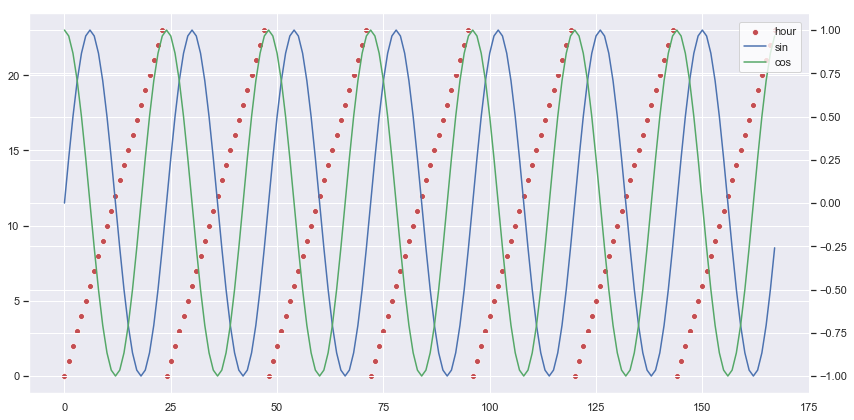

In [12]:
fig = plt.figure(figsize=(14,7))

sns.scatterplot(data=df.query('day_of_year <= 7')['hour'], color='r', legend='full')

ax2 = plt.twinx()
sns.lineplot(data=df.query('day_of_year <= 7')['hour_sin'], color='b', ax=ax2)
sns.lineplot(data=df.query('day_of_year <= 7')['hour_cos'], color='g', ax=ax2);

fig.legend(labels=['hour','sin','cos'], bbox_to_anchor=(0.8, 0.8), facecolor='white');

## Полный список преобразований

In [13]:
hours_in_day = 24
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / hours_in_day)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / hours_in_day)

minutes_in_hour = 60
df['minute_sin'] = np.sin(2 * np.pi * df['minute'] / minutes_in_hour)
df['minute_cos'] = np.cos(2 * np.pi * df['minute'] / minutes_in_hour)

minutes_in_day = 60*24
df['minute_of_day_sin'] = np.sin(2 * np.pi * (df['hour'] * 24 + df['minute']) / minutes_in_day)
df['minute_of_day_cos'] = np.cos(2 * np.pi * (df['hour'] * 24 + df['minute']) / minutes_in_day)

df['days_in_year'] = df.groupby('year')['day_of_year'].transform('max')
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / df['days_in_year'])
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / df['days_in_year'])

df['days_in_month'] = df.groupby('month')['day_of_month'].transform('max')
df['day_of_month_sin'] = np.sin(2 * np.pi * df['day_of_month'] / df['days_in_month'])
df['day_of_month_cos'] = np.cos(2 * np.pi * df['day_of_month'] / df['days_in_month'])

days_in_week = 7
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / days_in_week)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / days_in_week)

Обратите внимание, что в случае дней в месяце и дней в году будут присутствовать некоторые стыки при переходе пежду периодами, поскольку, в каждом месяце разное количество дней, а год может быть високосным. 

In [14]:
cols = [c for c in df.columns if 'cos' in c or 'sin' in c]
df[cols].head(11).T

,0,1,2,3,4,5,6,7,8,9,10
hour_sin,0.000000,0.258819,0.500000,0.707107,0.866025,0.965926,1.000000e+00,0.965926,0.866025,0.707107,0.500000
hour_cos,1.000000,0.965926,0.866025,0.707107,0.500000,0.258819,6.123234e-17,-0.258819,-0.500000,-0.707107,-0.866025
minute_sin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
minute_cos,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
minute_of_day_sin,0.000000,0.104528,0.207912,0.309017,0.406737,0.500000,5.877853e-01,0.669131,0.743145,0.809017,0.866025
minute_of_day_cos,1.000000,0.994522,0.978148,0.951057,0.913545,0.866025,8.090170e-01,0.743145,0.669131,0.587785,0.500000
day_of_year_sin,0.017213,0.017213,0.017213,0.017213,0.017213,0.017213,1.721336e-02,0.017213,0.017213,0.017213,0.017213
day_of_year_cos,0.999852,0.999852,0.999852,0.999852,0.999852,0.999852,9.998518e-01,0.999852,0.999852,0.999852,0.999852
day_of_month_sin,0.201299,0.201299,0.201299,0.201299,0.201299,0.201299,2.012985e-01,0.201299,0.201299,0.201299,0.201299
day_of_month_cos,0.979530,0.979530,0.979530,0.979530,0.979530,0.979530,9.795299e-01,0.979530,0.979530,0.979530,0.979530


# Линейное преобразование

Данное преобразование как бы противоположно предыдущему. Если в случае косинусо-синусного преобразования мы придавали данным цклическую форму, то в данном случае будем придавать непрерывно линейную. Т.е. с т.з. чисел они будут постоянно и равномерно увеличиваться. А с т.з. данных мы покажем, что, например, 10 часов второго дня идут строго после всех предыдущих часов второго и первого дня.

In [49]:
year_base = df['year'].min()
df['month_line'] = (df['year'] - year_base) * 12 + df['month']
df['week_line'] = (df['year'] - year_base) * 52 + df['week']
df['day_of_year_line'] = (df['year'] - year_base) * 365 + df['day_of_year']
df['hour_line'] = df['day_of_year_line'] * 24 + df['hour']

df['DT_D']*24 + df['DT'].dt.hour

In [50]:
df[['month_lin','week','day_of_year_lin','hour_lin']]

,month_lin,week,day_of_year_lin,hour_lin
0,1,1,1,0
1,1,1,1,1
2,1,1,1,2
3,1,1,1,3
4,1,1,1,4
5,1,1,1,5
6,1,1,1,6
7,1,1,1,7
8,1,1,1,8
9,1,1,1,9
